Interpolación

Ejercicio: Interpolar con 10 puntos generados de la función de 
Runge $$f(x) = \frac{1}{1+25x^2}$$ en el intervalo $[-1,1]$ equidistantes.
Hacer la gráfica con $10,000$ puntos en el mismo intervalo.
Utilizar polyfit para el polinomio interpolador y splines cúbicos


In [4]:
# importamos librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pprint
from scipy.interpolate import interp1d

In [17]:
#Generamos 10 puntos equidistantes en el intervalo indicado [-1,1] 
n = 10
my_min = -1
my_max = 1
x = np.linspace(my_min, my_max,n)
print(x)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


In [18]:
# definimos la funcion de Runge y evaluamos cada uno de los 10 puntos
f = lambda x: 1 / (1 + 25 * x **2)
y = f(x)
print(y)

[0.03846154 0.06202144 0.11473088 0.26470588 0.76415094 0.76415094
 0.26470588 0.11473088 0.06202144 0.03846154]


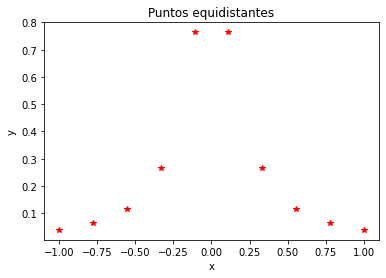

In [19]:
# graficamos los datos
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos equidistantes')
plt.show()

In [20]:
# realizamos el ajuste con polinomio interpolador
ndegree = n -1
coefficients = np.polyfit(x,y,ndegree)
print(coefficients)

[ 3.95904236e-13  2.16247748e+01 -7.20340386e-13 -4.49154581e+01
  3.86086351e-13  3.07285300e+01 -5.83700417e-14 -8.26092333e+00
 -8.80067031e-16  8.61538152e-01]


In [21]:
# utilizamos los coeficientes estimados para generar 10,000 puntos en el intervalo
neval = 10000
xeval = np.linspace(my_min,my_max, neval)
yeval = np.polyval(coefficients,xeval)

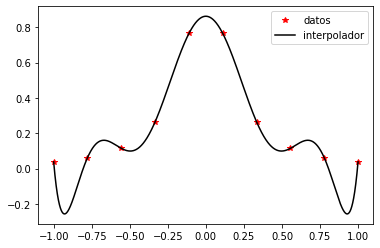

In [23]:
# mostramos la gráfica
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')
plt.show()

In [24]:
# realizamos el ajuste con splines
pw_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 
neval = 10000
xeval = np.linspace(my_min,my_max, neval)
yeval = pw_spline(xeval)

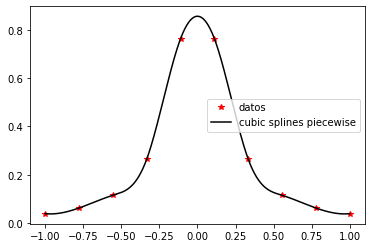

In [25]:
# mostramos el ajuste utilizando splines
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')
plt.show()